#Predicting User Favorability and Generating Album Details

Here I take a sample of user song ratings and use a decision tree to predict whether that user might like a song or not. Then I pull data from songs on Spotify that could potentially be used in a suggestion to the user for new music. 

#libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

from bs4 import BeautifulSoup
import requests

#predict spotify user preferences

In [ ]:
# import spotify data including user ratings
data = pd.read_csv('/content/spotdata.csv')

In [ ]:
# prep data for statistical analysis
train, test = train_test_split(data, test_size = 0.15)

In [ ]:
# splitting features based on whether user liked the song

pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']
pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data[data['target'] == 0]['danceability']
pos_duration = data[data['target'] == 1]['duration_ms']
neg_duration = data[data['target'] == 0]['duration_ms']
pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']
pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']
pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']
pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']
pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']
pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']
pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']

Text(0.5, 1.0, 'Song Instrumentalness Like/Dislike Distribution')

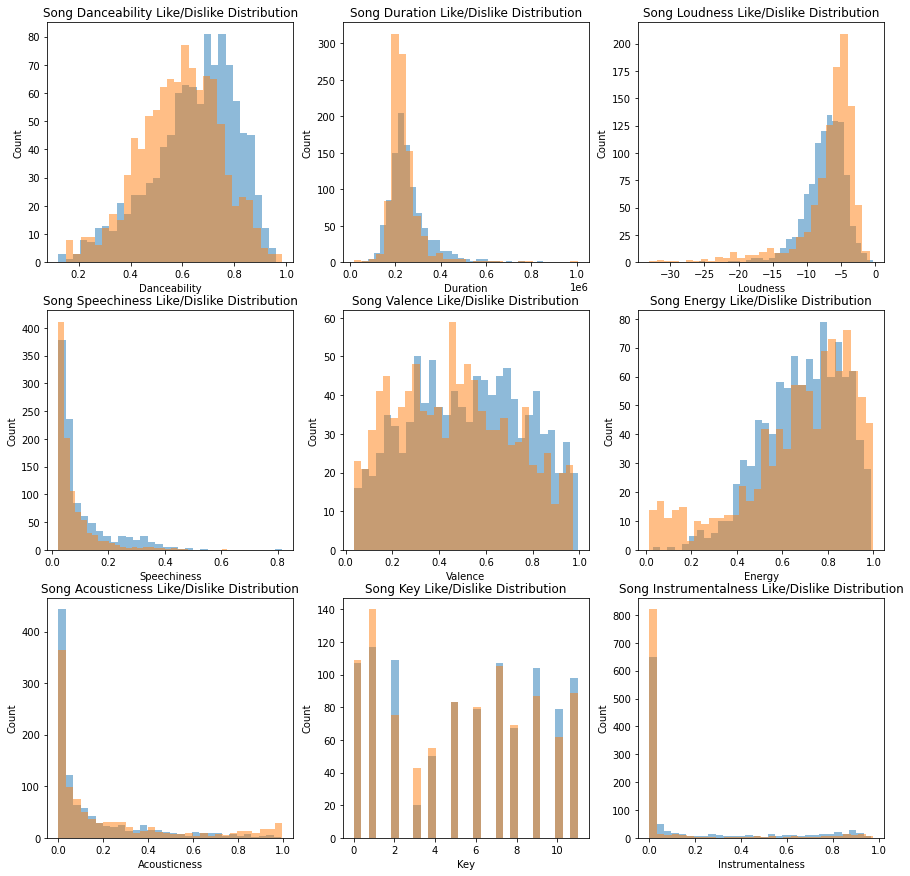

In [ ]:
# plotting the data with regard to whether the user liked the song or not

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Danceability
axs[0, 0].hist(pos_dance, alpha=0.5, bins=30)
axs[0, 0].hist(neg_dance, alpha=0.5, bins=30)
axs[0, 0].set_xlabel('Danceability')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_title('Song Danceability Like/Dislike Distribution')

# Duration
axs[0, 1].hist(pos_duration, alpha=0.5, bins=30)
axs[0, 1].hist(neg_duration, alpha=0.5, bins=30)
axs[0, 1].set_xlabel('Duration')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_title('Song Duration Like/Dislike Distribution')

# Loudness
axs[0, 2].hist(pos_loudness, alpha=0.5, bins=30)
axs[0, 2].hist(neg_loudness, alpha=0.5, bins=30)
axs[0, 2].set_xlabel('Loudness')
axs[0, 2].set_ylabel('Count')
axs[0, 2].set_title('Song Loudness Like/Dislike Distribution')

# Speechiness
axs[1, 0].hist(pos_speechiness, alpha=0.5, bins=30)
axs[1, 0].hist(neg_speechiness, alpha=0.5, bins=30)
axs[1, 0].set_xlabel('Speechiness')
axs[1, 0].set_ylabel('Count')
axs[1, 0].set_title('Song Speechiness Like/Dislike Distribution')

# Valence
axs[1, 1].hist(pos_valence, alpha=0.5, bins=30)
axs[1, 1].hist(neg_valence, alpha=0.5, bins=30)
axs[1, 1].set_xlabel('Valence')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('Song Valence Like/Dislike Distribution')

# Energy
axs[1, 2].hist(pos_energy, alpha=0.5, bins=30)
axs[1, 2].hist(neg_energy, alpha=0.5, bins=30)
axs[1, 2].set_xlabel('Energy')
axs[1, 2].set_ylabel('Count')
axs[1, 2].set_title('Song Energy Like/Dislike Distribution')

# Acousticness
axs[2, 0].hist(pos_acousticness, alpha=0.5, bins=30)
axs[2, 0].hist(neg_acousticness, alpha=0.5, bins=30)
axs[2, 0].set_xlabel('Acousticness')
axs[2, 0].set_ylabel('Count')
axs[2, 0].set_title('Song Acousticness Like/Dislike Distribution')

# Key
axs[2, 1].hist(pos_key, alpha=0.5, bins=30)
axs[2, 1].hist(neg_key, alpha=0.5, bins=30)
axs[2, 1].set_xlabel('Key')
axs[2, 1].set_ylabel('Count')
axs[2, 1].set_title('Song Key Like/Dislike Distribution')

# Instrumentalness
axs[2, 2].hist(pos_instrumentalness, alpha=0.5, bins=30)
axs[2, 2].hist(neg_instrumentalness, alpha=0.5, bins=30)
axs[2, 2].set_xlabel('Instrumentalness')
axs[2, 2].set_ylabel('Count')
axs[2, 2].set_title('Song Instrumentalness Like/Dislike Distribution')

In [ ]:
# using a decision tree to predict whether the user might like a song
c = DecisionTreeClassifier(min_samples_split=100)
features = ['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',]
X_train = train[features]
y_train = train['target']
X_test = test[features]
y_test = test['target']

In [ ]:
dt = c.fit(X_train, y_train)
y_pred = c.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.7161716171617162

#scrape spotify album details


In [ ]:
url = 'https://open.spotify.com/artist/053q0ukIDRgzwTr4vNSwab'
req = requests.get(url)
soup = BeautifulSoup(req.content, 'html.parser')

In [ ]:
#pulling album details from spotify

albumTag = soup.find('h2', string='Albums')
#print(albumTag)
albumSection = albumTag.find_parent('section')
#print(albumSection)
albums = albumSection.findAll('li')
#print(albums)

allAlbumDetails= []

for album in albums:
  #print(album)
  aTag= album.find('a')
  #print(aTag)
  albumLink = aTag['href']
  albumName = aTag['alt']
  albumImageDiv = aTag.find('div', {'class':'grid-item-image'})
  albumImage = albumImageDiv['data-src']
  print(albumLink,albumName, albumImage, sep='\n')

  albumDetails = {
      'name':albumName,
      'link':albumLink,
      'cover':albumImage
  }
  allAlbumDetails.append(albumDetails)

print(allAlbumDetails)

/album/5CQbuEmt9rY7yS2xPiXxw7
Miss Anthropocene (Rave Edition)
https://i.scdn.co/image/ab67616d00001e0239be5d35af9eda1162c1a82e
/album/2FQYkZIuXLy222CVzgPbQ0
Miss Anthropocene (Rave Edition)
https://i.scdn.co/image/ab67616d00001e025f143116163d3671f4d288c8
/album/6PVARuXkH97DKHlhI5wzgq
Miss Anthropocene
https://i.scdn.co/image/ab67616d00001e023fa9c007b77e43d653325d1e
/album/1MX7BXsAmeTI6uxBtBDB2X
Miss Anthropocene
https://i.scdn.co/image/ab67616d00001e024389a89bbfab170c960fb5cd
/album/4zyqNfmTrnvUejh8M1IEh9
Miss Anthropocene (Deluxe Edition)
https://i.scdn.co/image/ab67616d00001e021a302aafa2ea587960e27951
/album/2tKMfEo15Y4OMEm5sljPsJ
Miss Anthropocene
https://i.scdn.co/image/ab67616d00001e02a39f250fc79fa7fb74cebb58
/album/1t9k2P4C88alWEikeJb4mI
Art Angels
https://i.scdn.co/image/ab67616d00001e0266a5d4f87c16dbf2495bc18f
/album/7J84ixPVFehy6FcLk8rhk3
Art Angels
https://i.scdn.co/image/ab67616d00001e024f1235383b41920e64b00a78
[{'name': 'Miss Anthropocene (Rave Edition)', 'link': '/album/5